# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Kartik Bhatnagar
- Kai-Chin Shih 
- Sahana Srinivasan
- (Isaac) Fangzheng Xie 
- (Gin) Xiaojin Zheng 

# Group Members IDs

- A14020665
- A12879790
- A13741839
- A13768347
- A15674894

# Research Question

Are candidantes' trendiness on search engines, particularly Google, indicative of fundraising results?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis

Search engine trendiness figures positively correlate to campaign donorship.

# Dataset(s)

- Dataset 1 Name: BernieTrend.csv
- Link to the dataset: https://trends.google.com/trends/explore?q=%2Fm%2F01_gbv&geo=US
- Number of observations: 128 dates

- Dataset 2 Name: BernieTrend.csv
- Link to the dataset: https://www.fec.gov/data/receipts/individual-contributions/?two_year_transaction_period=2020&committee_id=C00696948&min_date=01%2F01%2F2019&max_date=12%2F31%2F2020
- Number of observations: 28170 transactions

- How we plan on combining datasets:

# Setup

In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning

In [3]:
dfBSTrend = pd.read_csv('bernietrend.csv')
# keep date and trend
dfBSTrend.columns = ['date','trend']
# drop na
dfBSTrend = dfBSTrend.drop([0], axis = 0)
# change data type
dfBSTrend['trend'] = dfBSTrend['trend'].apply(pd.to_numeric, errors = 'coerce')
dfBSTrend['date'] = dfBSTrend['date'].astype('datetime64')

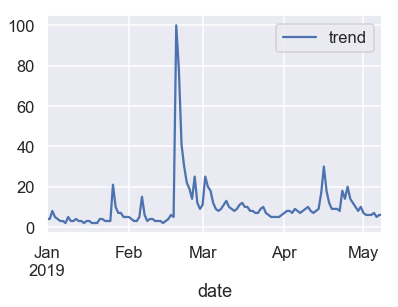

In [4]:
dfBSTrend.plot(x='date', y='trend')

In [5]:
dfBSFEC = pd.read_csv('FEC_Bernie2020.csv')
# keep certain columns
dfBSFEC = dfBSFEC[['transaction_id', 'contribution_receipt_date', 'contribution_receipt_amount', 'contributor_state']]
# change data type
dfBSFEC['contribution_receipt_date'] = dfBSFEC['contribution_receipt_date'].astype("datetime64")
dfBSFEC['contribution_receipt_amount'] = dfBSFEC['contribution_receipt_amount'].apply(pd.to_numeric)

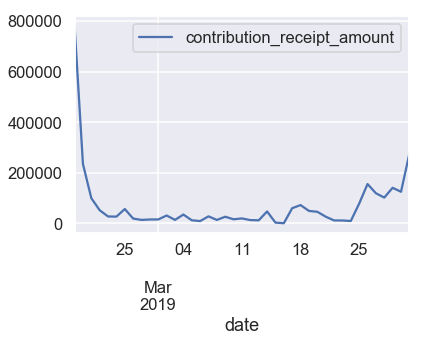

In [6]:
dfBSAmount = pd.pivot_table(dfBSFEC, index=['contribution_receipt_date'],values=["contribution_receipt_amount"],aggfunc=np.sum)
dfBSAmount.index.names = ['date']
dfBSAmount.plot()

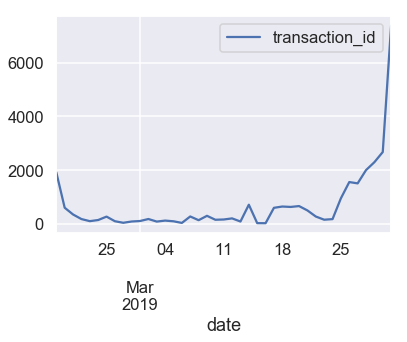

In [7]:
dfBSDonors = pd.pivot_table(dfBSFEC, index=['contribution_receipt_date'],values=["transaction_id"],aggfunc=lambda x: len(x.unique()))
dfBSDonors.index.names = ['date']
dfBSDonors.plot()

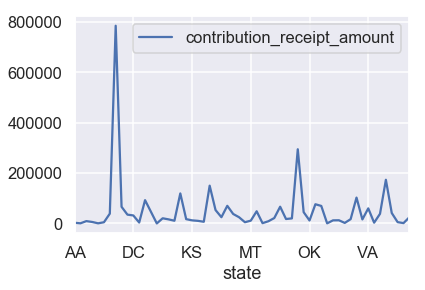

In [8]:
dfBSStates = pd.pivot_table(dfBSFEC, index=['contributor_state'],values=["contribution_receipt_amount"],aggfunc=np.sum)
dfBSStates.index.names = ['state']
dfBSStates.plot()

In [9]:
dfBSTrendStates = pd.read_csv('bernietrend_state.csv')
dfBSTrendStates.columns = ['state','trend']
dfBSTrendStates['trend'] = dfBSTrendStates['trend'].apply(pd.to_numeric, errors = 'coerce')
dfBSTrendStates = dfBSTrendStates.drop([0], axis = 0)
dfBSTrendStates = dfBSTrendStates.drop([1])
dfBSTrendStates

,state,trend
2,AL,14.0
3,AK,16.0
4,AZ,17.0
...,...,...
50,WV,18.0
51,WI,21.0
52,WY,17.0


# Data Analysis & Results

### Correlation between interest over time and daily total donations

In [1]:
merged = (pd.merge(dfBSAmount, dfBSTrend, how='outer', on='date'))
merged = merged.dropna()
ax = merged.plot('date','contribution_receipt_amount')
ax1 = ax.twinx()
merged.plot('date','trend',ax=ax1, color='r')

NameError: name 'pd' is not defined

### Correlation between interest over time and daily total transactions

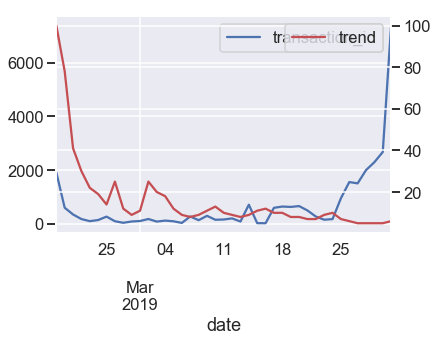

In [11]:
merged2 = (pd.merge(dfBSDonors, dfBSTrend, how='outer', on='date'))
merged2 = merged2.dropna()
ax = merged2.plot('date','transaction_id')
ax1 = ax.twinx()
merged2.plot('date','trend',ax=ax1, color='r')

### Correlation between interest by state and total funds raised to-date by state

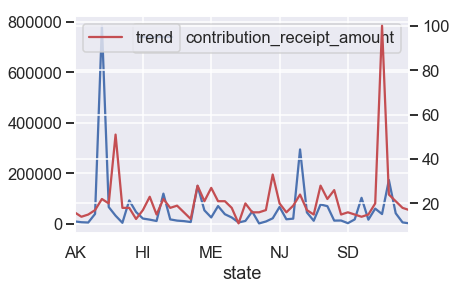

In [12]:
merged3 = (pd.merge(dfBSStates, dfBSTrendStates, how='outer', on='state'))
merged3 = merged3.dropna()
ax = merged3.plot('state','contribution_receipt_amount')
ax1 = ax.twinx()
merged3.plot('state','trend',ax=ax1, color='r')

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*